In [1]:
# two pickle files to create

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# letter can be capital , or may have space in between that we check after and before
print("Unique values in Attrition before cleaning: ", df['Attrition'].unique())

Unique values in Attrition before cleaning:  ['Yes' 'No']


In [9]:
df['Attrition']= df['Attrition'].astype(str).str.strip().str.capitalize()
print("Unique values in Attrition after cleaning: ", df['Attrition'].unique())

Unique values in Attrition after cleaning:  ['Yes' 'No']


Rows after filtering valid Attrition: 1470


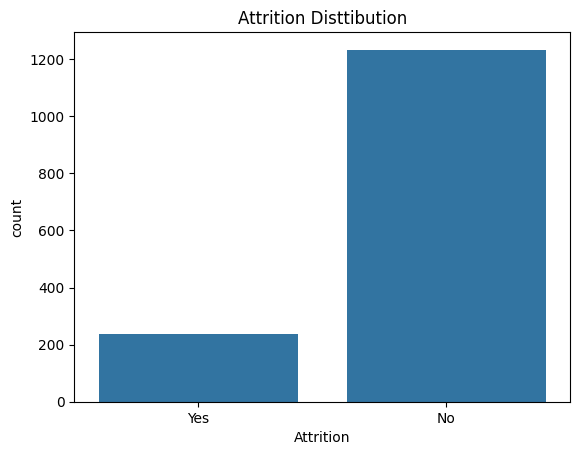

In [10]:
df_clean = df[df['Attrition'].isin(['Yes','No'])].copy()
print(f"Rows after filtering valid Attrition: {len(df_clean)}")

# optional: visualize target distribution
sns.countplot(x='Attrition',data=df_clean)
plt.title("Attrition Disttibution")
plt.show()

In [11]:
Y=df_clean['Attrition'].map({'Yes' : 1, 'No' : 0 })
X= df_clean.drop(columns=['Attrition'])

In [12]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [13]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [14]:
drop_cols = ['EmployeeCount','Over18','StandardHours','EmployeeNumber']
categorical_cols = ['BusinessTravel','Department','EducationField', 'JobRole','MaritalStatus', 'OverTime']
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [15]:
# FunctionTransformer module used, to transforn in standard format
def binary_cleanup(data):
    data = data.copy()
    data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
    data['OverTime'] = data['OverTime'].map({'Yes':1, 'No':0})
    return data.drop(columns=drop_cols)

binary_transformer = FunctionTransformer(binary_cleanup)

# Pipeline

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# transforms categorical and numerical
# it handles nulls values by using imputer automatically , we dont have to manually handle it through fillna by mean median mode 
# and scaler transforms the data
# imported by sklearn

# OneHotEncoder(drop='first'):
# OneHotEncoder is a tool that converts categorical values into numerical format by creating a new binary column for each unique category.
# drop='first' avoids dummy variable trap (i.e., removes one column to prevent multicollinearity).


# 🔧 GOAL:
# You're building a full machine learning pipeline that:

# Cleans and preprocesses numerical and categorical data, handles null values

# Applies any binary transformation (optional)

# Trains a logistic regression model


num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor =ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
],remainder='passthrough')

In [18]:

# full ml pipelining
full_pipeline = Pipeline([
    ('cleanup', binary_transformer), # Optional step (e.g., gender to 0/1)
    ('preprocessing', preprocessor),# Apply all transformations categorical and numerical
    ('model', LogisticRegression(max_iter=1000))# Train Logistic Regression model
])

In [19]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42, stratify = Y)

In [20]:
full_pipeline.fit(X_train, Y_train)

C:\Users\sheet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sheet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as

Pipeline(steps=[('cleanup',
                 FunctionTransformer(func=<function binary_cleanup at 0x000001F27CC94AE0>)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'Hou...
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus',
                                                   'OverTime'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [21]:
Y_pred = full_pipeline.predict(X_test)

In [22]:
print("\n Accuracy:" , accuracy_score(Y_test, Y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test,Y_pred))
print("\n Classification Report:\n", classification_report(Y_test,Y_pred))


 Accuracy: 0.8639455782312925

 Confusion Matrix:
 [[238   9]
 [ 31  16]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



In [23]:
import joblib

#save the trained pipeline to a joblib file
joblib.dump(full_pipeline, 'attrition_model.joblib')

print("Model saved as attrition_model.joblib")

Model saved as attrition_model.joblib


In [24]:
import joblib
import pandas as pd

# Load the trained pipeline
model = joblib.load("attrition_model.joblib")

# Create a sample input matching the original training feature columns
sample = pd.DataFrame([{
    'Age': 35,
    'DailyRate': 800,
    'DistanceFromHome': 10,
    'Education': 3,
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',
    'HourlyRate': 60,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobSatisfaction': 3,
    'MonthlyIncome': 5000,
    'MonthlyRate': 15000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 4,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'EducationField': 'Life Sciences',
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Single',
    'EmployeeCount': 1,
    'Over18': 'Y',
    'StandardHours': 80,
    'EmployeeNumber': 12345
}])

prediction = model.predict(sample)[0]
print(prediction)
label = "Yes (Will Leave)" if prediction == 1 else "No (Will Stay)"
print("Prediction:", label)

0
Prediction: No (Will Stay)


In [25]:
sample.shape

(1, 34)